In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For logistic regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# Load the Ames Housing dataset (you may need to adjust the file path)
data = pd.read_csv('train.csv')


In [3]:
central_air_counts = data['CentralAir'].value_counts()
print("Distribution of 'CentralAir':")
print(central_air_counts)

Distribution of 'CentralAir':
CentralAir
Y    1365
N      95
Name: count, dtype: int64


In [4]:
central_air_counts/len(data)

,count
CentralAir,
Y,0.934932
N,0.065068


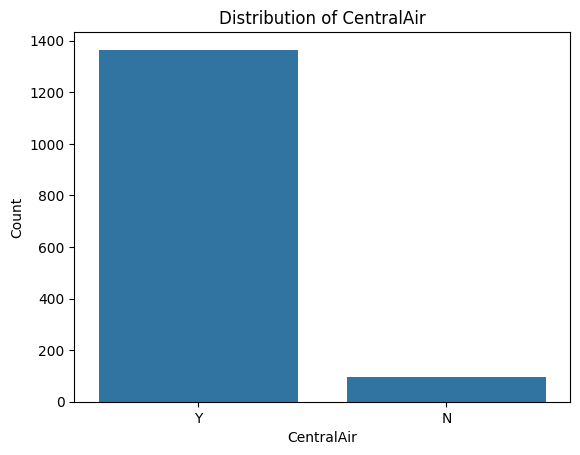

In [5]:
# Plot the distribution
sns.countplot(x='CentralAir', data=data)
plt.title('Distribution of CentralAir')
plt.xlabel('CentralAir')
plt.ylabel('Count')
plt.show()


In [6]:
data['CentralAir_Binary'] = data['CentralAir'].map({'Y': 1, 'N': 0})

In [7]:
# Select relevant features
features = ['CentralAir_Binary', 'GrLivArea', 'OverallQual']

# Compute correlation matrix
corr_matrix = data[features].corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                   CentralAir_Binary  GrLivArea  OverallQual
CentralAir_Binary           1.000000   0.093666     0.272038
GrLivArea                   0.093666   1.000000     0.593007
OverallQual                 0.272038   0.593007     1.000000


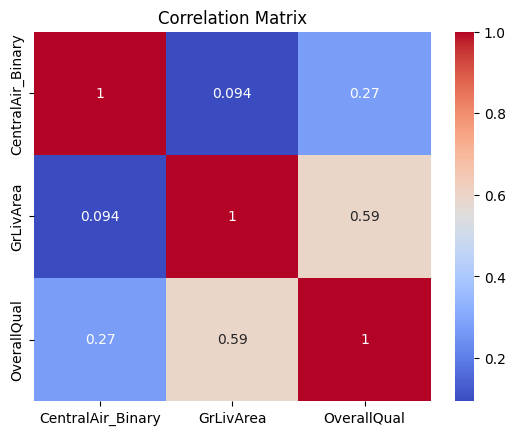

In [8]:
# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [9]:
print("Missing values in predictors:")
print(data[['GrLivArea', 'OverallQual']].isnull().sum())

Missing values in predictors:
GrLivArea      0
OverallQual    0
dtype: int64


In [10]:
# Prepare the data for modeling
X = data[['GrLivArea', 'OverallQual']]
y = data['CentralAir_Binary']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.196362
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:      CentralAir_Binary   No. Observations:                 1460
Model:                          Logit   Df Residuals:                     1457
Method:                           MLE   Df Model:                            2
Date:                Wed, 26 Nov 2025   Pseudo R-squ.:                  0.1842
Time:                        14:02:22   Log-Likelihood:                -286.69
converged:                       True   LL-Null:                       -351.41
Covariance Type:            nonrobust   LLR p-value:                 7.793e-29
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.5008      0.535     -4.671      0.000      -3.550      -1.451
GrLivArea      -0.0007    

In [11]:
# Extract p-values from the model summary
p_values = model.pvalues
print("P-values of the coefficients:")
print(p_values)

# Interpret the effect of 'GrLivArea' if it's statistically significant
if p_values['GrLivArea'] < 0.05:
    print("'GrLivArea' is statistically significant at the 5% level.")
else:
    print("'GrLivArea' is not statistically significant at the 5% level.")

P-values of the coefficients:
const          2.995191e-06
GrLivArea      6.074883e-03
OverallQual    7.731931e-22
dtype: float64
'GrLivArea' is statistically significant at the 5% level.


In [12]:
# Calculate and interpret odds ratios
odds_ratios = np.exp(model.params)
print("Odds Ratios:")
print(odds_ratios)

Odds Ratios:
const          0.082023
GrLivArea      0.999255
OverallQual    3.157930
dtype: float64


In [31]:
# Split the data into training and testing sets
X = data[['GrLivArea', 'OverallQual']]
y = data['CentralAir_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:


# Add constant to training and testing data
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the model on training data
model = sm.Logit(y_train, X_train).fit()

# Predict on testing data
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions using 0.5 threshold
y_pred = (y_pred_prob >= 0.5).astype(int)

# Manually calculate confusion matrix
tp = np.sum((y_test == 1) & (y_pred == 1))
tn = np.sum((y_test == 0) & (y_pred == 0))
fp = np.sum((y_test == 0) & (y_pred == 1))
fn = np.sum((y_test == 1) & (y_pred == 0))

print("Confusion Matrix:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

# Calculate accuracy manually
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy}")


Optimization terminated successfully.
         Current function value: 0.199981
         Iterations 8
Confusion Matrix:
True Positives (TP): 273
True Negatives (TN): 2
False Positives (FP): 17
False Negatives (FN): 0
Accuracy: 0.9417808219178082


In [36]:
print(len(y_pred_prob))
print(len(y_pred))

292
292


([np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.9963369963369964), np.float64(0.9963369963369964), np.float64(0.9963369963369964), np.float64(0.9963369963369964), np.float64(0.9963369963369964), np.float64(0.9963369963369964), np.float64(0.9963369963369964), np.float64(0.9963369963369964), np.float64(0.9963369963369964), np.float64(0.9926739926739927), np.float64(0.9853479853479854), np.float64(0.9706959706959707), np.float64(0.9633699633699634), np.float64(0.9377289377289377), np.float64(0.9340659340659341), np.float64(0.9304029304029304), np.float64(0.89743589743589

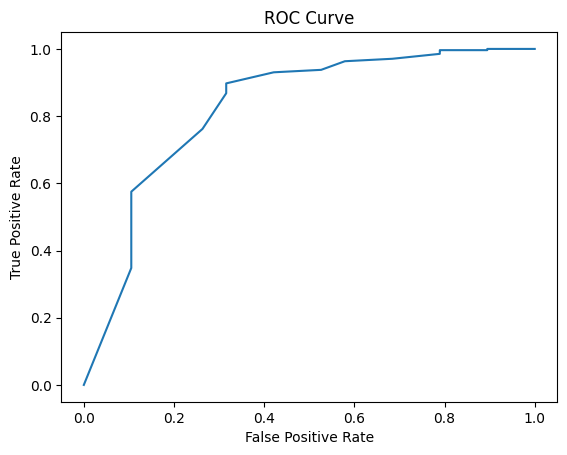

In [44]:
# build a function that compute the ROC values when moving the threshold
def compute_roc(y_test, y_pred_prob):
    tpr = []
    fpr = []
    thresholds = np.linspace(0, 1, 50)
    for threshold in thresholds:
        y_pred = (y_pred_prob >= threshold).astype(int)
        tp = np.sum((y_test == 1) & (y_pred == 1))
        tn = np.sum((y_test == 0) & (y_pred == 0))
        fp = np.sum((y_test == 0) & (y_pred == 1))
        fn = np.sum((y_test == 1) & (y_pred == 0))
        tpr.append(tp / (tp + fn))
        fpr.append(fp / (fp + tn))
    return tpr, fpr, threshold

results = compute_roc(y_test, y_pred_prob)
print(results)

# plots the ROC
plt.plot(results[1], results[0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

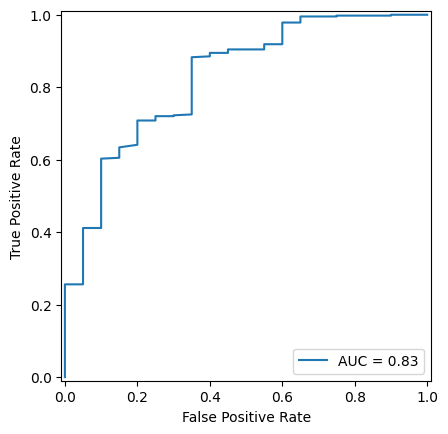

In [15]:
#plot the ROC
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# use RocCurveDisplay
from sklearn.metrics import RocCurveDisplay
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()


In [61]:
# build nfold cross validation using skitlean
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(skf.get_n_splits(X, y))

fold_train = X_train.iloc[list(skf.split(X_train, y_train))[0][0]]

fold_validation = X_train.iloc[list(skf.split(X_train, y_train))[0][1]]
print(fold_train.shape)
print(fold_validation.shape)


5
(934, 3)
(234, 3)
